In [1]:
# Author: Marco Lugo
# Description: Monty Hall Paradox simulator. See README for more details.

import random
import pandas as pd
import matplotlib.pyplot as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
class MontyHallParadox:
    def __init__(self, n=10000, seed=404):
        self.n = n # how many iterations?
        random.seed(seed) # seed for pseudo-random number generation; for reproducibility purposes
    
    @staticmethod
    def play_once():
        doors = [0, 1, 2] # 3 possible doors
        prizes = [1, 0, 0] # 1 for car, 0 for goat
        random.shuffle(prizes) # randomize prizes
        guest_choice = random.choice(doors) # pick random door for first choice
        host_choice = random.choice([d for d in doors if prizes[d] == 0 and d != guest_choice]) # host chooses one of the goat doors randomly
        guest_choice_switched = [d for d in doors if d not in [guest_choice, host_choice]][0] # choice if guest chooses to switch
        return {'no_switch': bool(prizes[guest_choice]), 'switch': bool(prizes[guest_choice_switched])}
        
    def run(self):
        results_switch = [] # list to store the results of the switching strategy
        results_noswitch = [] # list to store the results of the non-switching strategy
        for i in range(self.n): 
            result = self.play_once()
            results_switch.append(result['switch'])
            results_noswitch.append(result['no_switch'])
        self.df = pd.DataFrame({'switch_win': results_switch, 'no_switch_win': results_noswitch})
        self.df['cum_wins_switch_pct'] = self.df['switch_win'].cumsum() / (self.df.index + 1) # create cumulative switch strategy %
        self.df['cum_wins_no_switch_pct'] = self.df['no_switch_win'].cumsum() / (self.df.index + 1) # create cumulative non-switch strategy %
        
    def show_stats(self):
        print(f'Number of plays per strategy: {self.n}')
        print(f'Switching strategy won {self.df["switch_win"].mean()*100}% of the time.')
        print(f'Non-switching strategy won {self.df["no_switch_win"].mean()*100}% of the time.')
        
    def show_graph(self):
        ax = self.df[['cum_wins_switch_pct', 'cum_wins_no_switch_pct']].plot.area(figsize=(15,8), alpha=0.35, stacked=False, grid=True, fontsize=12)
        ax.set_title('Cumulative Chances of Winning', size=21)
        ax.set_xlabel('Number of Iterations', size=14)
        ax.set_ylabel('Win Percentage',  size=14)
        ax.legend(['', ''])

In [3]:
monty = MontyHallParadox(n=100000)
monty.run()

In [4]:
monty.show_stats()

Number of plays per strategy: 100000
Switching strategy won 66.62% of the time.
Non-switching strategy won 33.379999999999995% of the time.


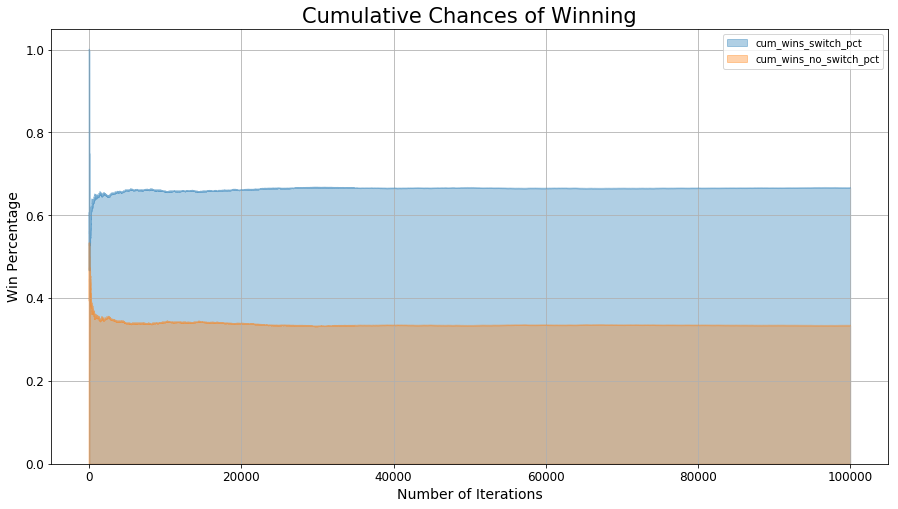

In [5]:
monty.show_graph()

In [6]:
%%timeit
monty_benchmark = MontyHallParadox(n=100000)
monty_benchmark.run()

847 ms ± 6.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
